# YOLOv3 Keras API Image Object Detection

In this notebook 2D Object Detection is done using a pretrained (MSCOCO dataset) YOLOv3 model. This notebook is mainly based on [this article](https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras). **I have not created nor trained this model.**

To start, we can import the necessary packages:

In [1]:
#YOLOv3 model
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers import Add, Concatenate
from keras.models import Model

from keras.models import load_model

# visualisation
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# loading data
import os
from numpy import expand_dims
from tensorflow.keras.utils import load_img, img_to_array

2023-03-13 23:45:23.471762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 23:45:23.607293: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 23:45:23.607313: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 23:45:24.240242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

We also have some `.py` files containing the model and visualisation functions. These are as follows:

- `yolov3_model.py`
- `visualisation.py`

They contain functions and classes that we import:

In [2]:
from yolov3_model import *
from visualisation import *

Now we can create the model, importing and loading the weights. This allows us to save the model to the `model.h5` file:

*NOTE: The weights and data we are using should be stored in this notebooks directory.*

In [ ]:
# define the model
model = make_yolov3_model()

# load the model weights
weight_reader = WeightReader('yolov3.weights')

# set the model weights into the model
weight_reader.load_weights(model)

# save the model to file
model.save('model.h5')

Since we have this model saved, we can load it in as follows:

In [3]:
# load yolov3 model
model = load_model('model.h5')

2023-03-13 23:45:26.790503: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-13 23:45:26.790531: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-13 23:45:26.790545: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seanor): /proc/driver/nvidia/version does not exist
2023-03-13 23:45:26.790700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The following is the summary of the model:

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv_0 (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bnorm_0 (BatchNormalization)   (None, None, None,   128         ['conv_0[0][0]']                 
                                32)                                                           

                                                                                                  
 bnorm_9 (BatchNormalization)   (None, None, None,   256         ['conv_9[0][0]']                 
                                64)                                                               
                                                                                                  
 leaky_9 (LeakyReLU)            (None, None, None,   0           ['bnorm_9[0][0]']                
                                64)                                                               
                                                                                                  
 conv_10 (Conv2D)               (None, None, None,   73728       ['leaky_9[0][0]']                
                                128)                                                              
                                                                                                  
 bnorm_10 

                                256)                                                              
                                                                                                  
 bnorm_20 (BatchNormalization)  (None, None, None,   1024        ['conv_20[0][0]']                
                                256)                                                              
                                                                                                  
 leaky_20 (LeakyReLU)           (None, None, None,   0           ['bnorm_20[0][0]']               
                                256)                                                              
                                                                                                  
 add_5 (Add)                    (None, None, None,   0           ['add_4[0][0]',                  
                                256)                              'leaky_20[0][0]']               
          

 conv_32 (Conv2D)               (None, None, None,   294912      ['leaky_31[0][0]']               
                                256)                                                              
                                                                                                  
 bnorm_32 (BatchNormalization)  (None, None, None,   1024        ['conv_32[0][0]']                
                                256)                                                              
                                                                                                  
 leaky_32 (LeakyReLU)           (None, None, None,   0           ['bnorm_32[0][0]']               
                                256)                                                              
                                                                                                  
 add_9 (Add)                    (None, None, None,   0           ['add_8[0][0]',                  
          

                                                                                                  
 add_12 (Add)                   (None, None, None,   0           ['add_11[0][0]',                 
                                512)                              'leaky_42[0][0]']               
                                                                                                  
 conv_44 (Conv2D)               (None, None, None,   131072      ['add_12[0][0]']                 
                                256)                                                              
                                                                                                  
 bnorm_44 (BatchNormalization)  (None, None, None,   1024        ['conv_44[0][0]']                
                                256)                                                              
                                                                                                  
 leaky_44 

                                512)                                                              
                                                                                                  
 add_16 (Add)                   (None, None, None,   0           ['add_15[0][0]',                 
                                512)                              'leaky_54[0][0]']               
                                                                                                  
 conv_56 (Conv2D)               (None, None, None,   131072      ['add_16[0][0]']                 
                                256)                                                              
                                                                                                  
 bnorm_56 (BatchNormalization)  (None, None, None,   1024        ['conv_56[0][0]']                
                                256)                                                              
          

 bnorm_66 (BatchNormalization)  (None, None, None,   2048        ['conv_66[0][0]']                
                                512)                                                              
                                                                                                  
 leaky_66 (LeakyReLU)           (None, None, None,   0           ['bnorm_66[0][0]']               
                                512)                                                              
                                                                                                  
 conv_67 (Conv2D)               (None, None, None,   4718592     ['leaky_66[0][0]']               
                                1024)                                                             
                                                                                                  
 bnorm_67 (BatchNormalization)  (None, None, None,   4096        ['conv_67[0][0]']                
          

                                                                                                  
 leaky_77 (LeakyReLU)           (None, None, None,   0           ['bnorm_77[0][0]']               
                                512)                                                              
                                                                                                  
 conv_78 (Conv2D)               (None, None, None,   4718592     ['leaky_77[0][0]']               
                                1024)                                                             
                                                                                                  
 bnorm_78 (BatchNormalization)  (None, None, None,   4096        ['conv_78[0][0]']                
                                1024)                                                             
                                                                                                  
 leaky_78 

                                128)                                                              
                                                                                                  
 bnorm_96 (BatchNormalization)  (None, None, None,   512         ['conv_96[0][0]']                
                                128)                                                              
                                                                                                  
 leaky_96 (LeakyReLU)           (None, None, None,   0           ['bnorm_96[0][0]']               
                                128)                                                              
                                                                                                  
 up_sampling2d_1 (UpSampling2D)  (None, None, None,   0          ['leaky_96[0][0]']               
                                128)                                                              
          

 leaky_104 (LeakyReLU)          (None, None, None,   0           ['bnorm_104[0][0]']              
                                256)                                                              
                                                                                                  
 conv_81 (Conv2D)               (None, None, None,   261375      ['leaky_80[0][0]']               
                                255)                                                              
                                                                                                  
 conv_93 (Conv2D)               (None, None, None,   130815      ['leaky_92[0][0]']               
                                255)                                                              
                                                                                                  
 conv_105 (Conv2D)              (None, None, None,   65535       ['leaky_104[0][0]']              
          

We need to load in and preprocess images, done as follows:

In [5]:
# load and prepare an image
def load_image_pixels(filename, shape):
    '''
    Function preprocess the images to 416x416, which is the standard input shape for YOLOv3, 
    and also keeps track of the originl shape, which is later used to draw the boxes.
    
    paramters:
    filename {String}: path to the image
    shape {tuple}: shape of the input dimensions of the network
    
    returns:
    image {PIL}: image of shape 'shape'
    width {int}: original width of the picture
    height {int}: original height of the picture
    '''
    
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    
    # convert to numpy array
    image = img_to_array(image)
    
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    
    return image, width, height

The model requires certain parameters we define here:

In [6]:
# Parameters used in the Dataset, on which YOLOv3 was pretrained
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

# define the expected input shape for the model
WIDTH, HEIGHT = 416, 416

# define the probability threshold for detected objects
class_threshold = 0.3

# what colour each label corresponds to for our boxes
label_map = {
    "person": "blue",
    "bicycle": "yellow", 
    "car": "red",
    "truck": "green",
    "motorbike": "white", 
    "aeroplane": "white", 
    "bus": "white",
    "train": "white", 
    "boat": "white"
}

We can now import the images we intend to work on:

In [7]:
# import images to work on
images = sorted(os.listdir('AV_test2_images'))

Finally we can test the model on each image, creating the bounding boxes and plotting each image:

1/1 [==============================] - 1s 1s/step


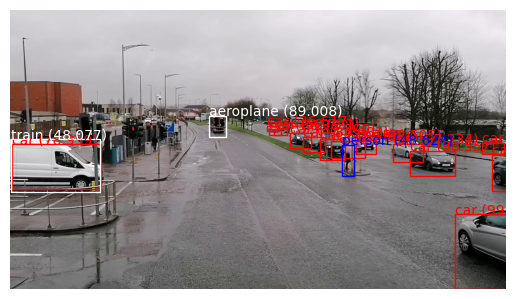

1/1 [==============================] - 0s 310ms/step


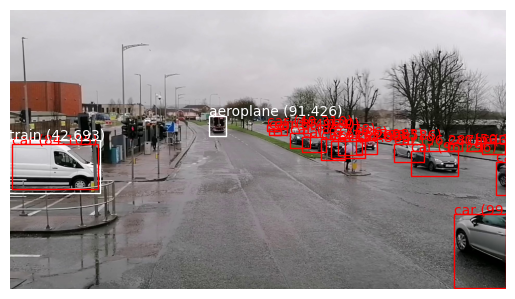

1/1 [==============================] - 0s 277ms/step


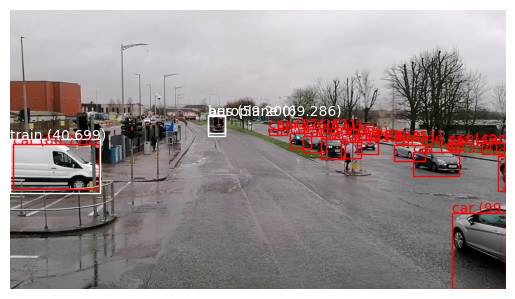

1/1 [==============================] - 0s 271ms/step


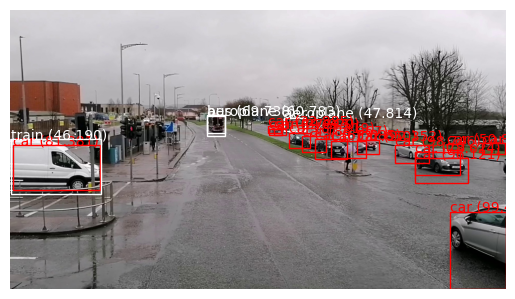

1/1 [==============================] - 0s 276ms/step


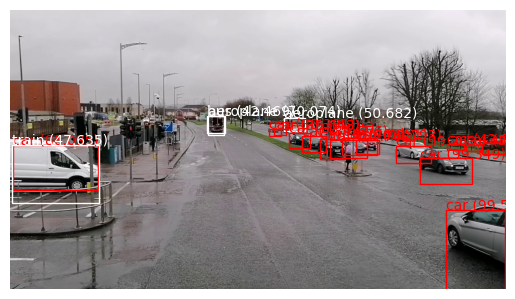

1/1 [==============================] - 0s 323ms/step


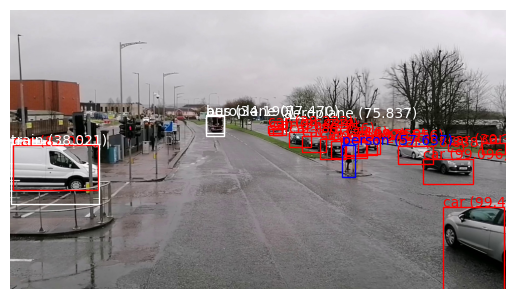

1/1 [==============================] - 0s 316ms/step


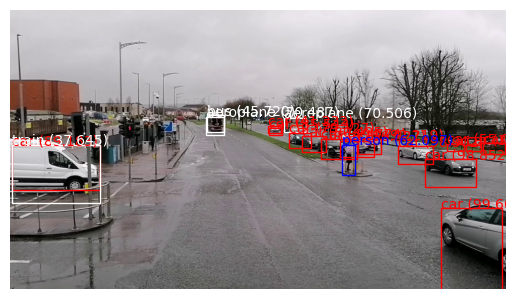

1/1 [==============================] - 0s 305ms/step


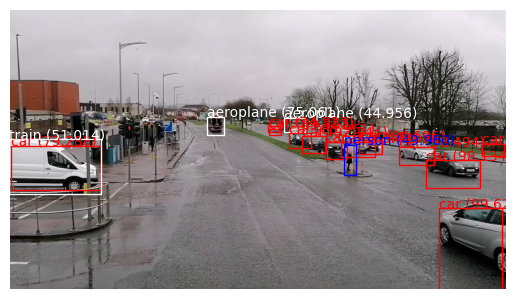

1/1 [==============================] - 0s 322ms/step


In [ ]:
for file in images:
    photo_filename = 'AV_test2_images/' + file
    
    # load picture with old dimensions
    image, image_w, image_h = load_image_pixels(photo_filename, (WIDTH, HEIGHT))
    
    # Predict image
    y_hat = model.predict(image)
    
    # Create boxes
    boxes = list()
    for i in range(len(y_hat)):
        # decode the output of the network
        boxes += decode_netout(y_hat[i][0], anchors[i], class_threshold, HEIGHT, WIDTH)

    # correct the sizes of the bounding boxes for the shape of the image
    correct_yolo_boxes(boxes, image_h, image_w, HEIGHT, WIDTH)

    # suppress non-maximal boxes
    do_nms(boxes, 0.5)

    # define the labels (Filtered only the ones relevant for this task, which were used in pretraining the YOLOv3 model)
    labels = list(label_map.keys())

    # get the details of the detected objects
    v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

    # draw what we found
    draw_boxes(photo_filename, v_boxes, v_labels, v_scores, label_map, save_fig=True)